In [70]:
import matplotlib
import scipy.io
import numpy as np
import random
from matplotlib import pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, FloatSlider
from IPython.display import display
from ipywidgets import interact, FloatSlider, VBox, HBox
from IPython.display import display
from matplotlib.patches import Circle

In [71]:
# Known data
G = 0.14 # Nms
I = 0.15 # kgm^2
tau = 60 # ms
# geometry
l_forearm = 33 # cm - wrist-elbow
l_arm = 30 # cm - elbow-shoulder
# targets
r = 18 # cm
t = 0.6 # s - time reaching movement


In [84]:
# x[k+1] = A*x[k] + B*u[k]

# choose data for the state
theta = 45 # degrees (pi/4)
vel = r/t # cm/s
theta_dot = vel/l_forearm # rad/s
T = 0.5 # Ncm - random value
print("linear velocity : ", vel)
print("angular velocity : ", theta_dot)

# state vector x 
x = np.array((theta, theta_dot, T)).reshape(3,1)
print("state vector : ","\n", x)

# inputs u
u = 1
u = np.heaviside(u,1)
print("input : ", u)

linear velocity :  30.0
angular velocity :  0.9090909090909091
state vector :  
 [[45.        ]
 [ 0.90909091]
 [ 0.5       ]]
input :  1.0


In [73]:
A = np.array([0,1,0,0,(-G/I),1/I,0,0,(-1/tau)]).reshape((3,3))
print("A matrix : ","\n",A)

A matrix :  
 [[ 0.          1.          0.        ]
 [ 0.         -0.93333333  6.66666667]
 [ 0.          0.         -0.01666667]]


In [74]:
B = np.array([0,0,(1/tau)]).reshape((3,1))
print("B matrix : ","\n", B)

B matrix :  
 [[0.        ]
 [0.        ]
 [0.01666667]]


In [75]:
# model implementation for single joint case and single reaching movement
# x[k+1] = A*x[k] + B*u[k]

y = np.matmul(A,x) + B*u
print("angular velocity : ", y[0], " corresponds to the initial computed value")
print("angular acceleration : ", y[1])
print("torque derivative : ", y[2])

angular velocity :  [0.90909091]  corresponds to the initial computed value
angular acceleration :  [2.48484848]
torque derivative :  [0.00833333]


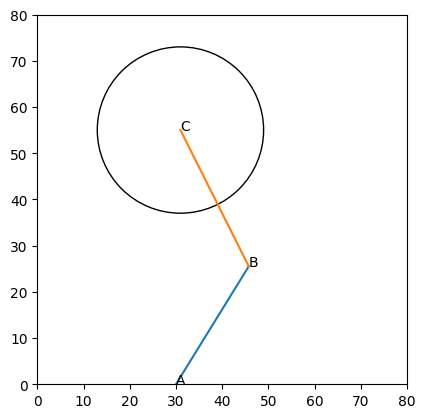

In [76]:

A = [30,0]
theta_shoulder = 45 # deg
theta_elbow = 90 # deg
# compute joint positions 
B = [0,0]
B[0] = A[0] + np.cos(theta_shoulder)*l_arm
B[1] = A[1] + np.sin(theta_shoulder)*l_arm
C = [0,0]
C[0] = B[0] + np.cos(theta_elbow)*l_forearm
C[1] = B[1] + np.sin(theta_elbow)*l_forearm

# figure 
fig, ax = plt.subplots()
plt.gca().set_aspect('equal', adjustable='box') 
ax.add_patch(Circle((C[0],C[1]),18,fill=False))
plt.xlim(0,80)
plt.ylim(0,80)
plt.plot([A[0],B[0]],[A[1],B[1]])
plt.plot([B[0],C[0]],[B[1],C[1]])
labels = ['A','B','C']
plt.text(A[0],A[1],'A')
plt.text(B[0],B[1],'B')
plt.text(C[0],C[1],'C')

plt.show()

Initial theta :  [45.]
Initial state :  
 [[45.        ]
 [ 0.90909091]
 [ 0.5       ]]


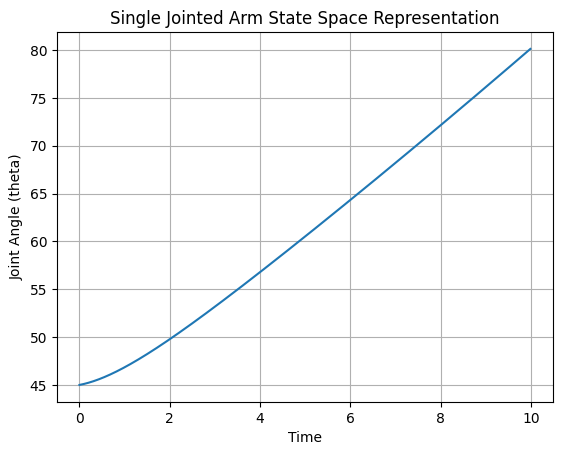

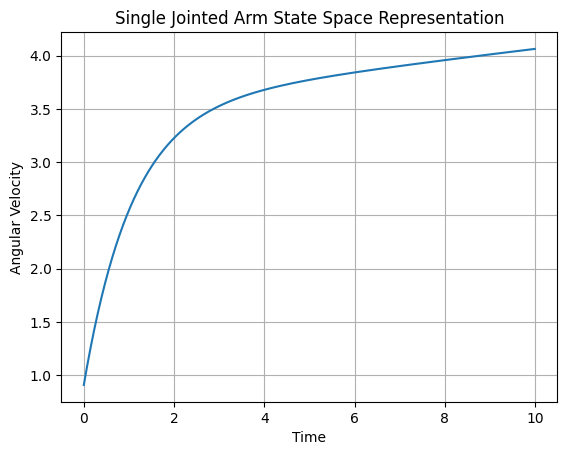

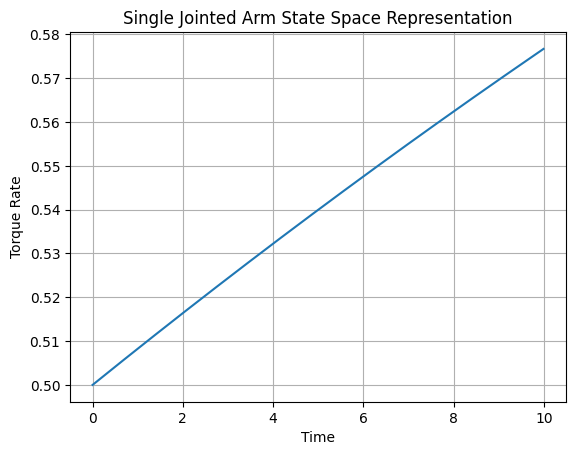

In [85]:
# One Joint Testing
# Initial state
A = np.array([0,1,0,0,(-G/I),1/I,0,0,(-1/tau)]).reshape((3,3))
B = np.array([0,0,(1/tau)]).reshape((3,1))
# x = np.array([[0],[0],[0]])
x = np.array((theta, theta_dot, T)).reshape(3,1)
print("Initial theta : ", x[0])
print("Initial state : ","\n", x)
dt = 0.01
timesteps = 1000

theta_values = []
theta_dot_values = []
torque_rate_values = []
time_values = []

for _ in range(timesteps):
    theta_values.append(x[0])  # Store the joint angle
    theta_dot_values.append(x[1])  # Store the angular velocity
    torque_rate_values.append(x[2])  # Store the torque rate
    time_values.append(_ * dt)  # Store the time
    x_dot = np.matmul(A, x) + np.dot(B, u)  # Calculate x_dot
    x = x + x_dot * dt  # Update the state using Euler's method

# Convert the lists to NumPy arrays for plotting
theta_values = np.array(theta_values)
time_values = np.array(time_values)

# Plot the joint angle over time
plt.plot(time_values, theta_values)
plt.xlabel("Time")
plt.ylabel("Joint Angle (theta)")
plt.title("Single Jointed Arm State Space Representation")
plt.grid(True)
plt.show()

# Plot the angular velocity over time
plt.plot(time_values, theta_dot_values)
plt.xlabel("Time")
plt.ylabel("Angular Velocity")
plt.title("Single Jointed Arm State Space Representation")
plt.grid(True)
plt.show()

# Plot the torque rate over time
plt.plot(time_values, torque_rate_values)
plt.xlabel("Time")
plt.ylabel("Torque Rate")
plt.title("Single Jointed Arm State Space Representation")
plt.grid(True)
plt.show()



In [94]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from IPython.display import display

# Define the system matrices A and B
A = np.array([0, 1, 0, 0, (-G/I), 1/I, 0, 0, (-1/tau)]).reshape((3, 3))
B = np.array([0, 0, 1/tau]).reshape((3, 1))

# Initialize the state vector x and input u
x = np.array([0, 0, 0]).reshape(3, 1)
u = np.array([0])

# Function to update the plot based on the input angle (theta)
def update_arm(theta):
    global x  # Declare x as a global variable to update it
    global u  # Declare u as a global variable

    # Calculate x_dot using A, x, and B
    x_dot = np.dot(A, x) + np.dot(B, u)

    # Extract theta_dot and T_dot from x_dot
    theta_dot = x_dot[0][0]
    T_dot = x_dot[2][0]

    # Clear the previous plot
    plt.clf()

    # Calculate the arm segment endpoints
    x0, y0 = 0, 0
    x1 = np.sin(np.deg2rad(theta))
    y1 = -np.cos(np.deg2rad(theta))

    # Plot the arm segment
    plt.plot([x0, x1], [y0, y1], 'r-')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Arm at θ = {theta} degrees")

    # Update the state x
    x = x +  0.01 * x_dot  # This will update x based on the calculated x_dot

    # Plot theta_dot and T_dot
    plt.text(0.5, 0.5, f"Theta_dot: {theta_dot:.2f}", fontsize=12)
    plt.text(0.5, 0.4, f"T_dot: {T_dot:.2f}", fontsize=12)

# Create an interactive slider
theta_slider = FloatSlider(value=45.0, min=0, max=360.0, step=1.0, description="θ (degrees)")

# Display the interactive plot
interact(update_arm, theta=theta_slider)
display()


interactive(children=(FloatSlider(value=45.0, description='θ (degrees)', max=360.0, step=1.0), Output()), _dom…